#Imports

In [ ]:
!pip install py3dep -q

     |████████████████████████████████| 419kB 19.8MB/s 
     |████████████████████████████████| 235kB 46.8MB/s 
     |████████████████████████████████| 6.5MB 50.6MB/s 
     |████████████████████████████████| 1.3MB 41.7MB/s 
     |████████████████████████████████| 204kB 58.0MB/s 
     |████████████████████████████████| 481kB 50.6MB/s 
     |████████████████████████████████| 133kB 56.1MB/s 
     |████████████████████████████████| 1.0MB 49.0MB/s 
     |████████████████████████████████| 4.7MB 48.3MB/s 
     |████████████████████████████████| 19.1MB 214kB/s 
     |████████████████████████████████| 143kB 57.9MB/s 
     |████████████████████████████████| 296kB 52.1MB/s 
     |████████████████████████████████| 235kB 38.9MB/s 
     |████████████████████████████████| 15.3MB 339kB/s 
     |████████████████████████████████| 317kB 51.2MB/s 


In [ ]:
!pip install pynhd -q

In [ ]:
!pip install geopandas -q

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import torch
import torchvision
from torch import save
import torch.utils.tensorboard as tb
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import random 
import os, math
from os import path
import seaborn as sns

import py3dep
import geopandas as gpd
from pynhd import NLDI
import xarray as xr
import rasterio
import shapely
from shapely.geometry import Point
import warnings
from shapely.ops import transform

# Random Data Generator

In [ ]:
class SuperTuxDataset(Dataset):
    def __init__(self, num_samples, data_transforms=None):
        """
        Your code here
        Hint: Use the python csv library to parse labels.csv
        """
        X = np.zeros((num_samples, 4, 24, 24))
        y = np.zeros((1, num_samples))

        for i in range(num_samples):
          next_y = 0
          for j in range(4):
            X[i, j, 0, 0] = random.gauss(1,1)
            h_slope = random.randint(0,1)
            v_slope = random.randint(0,1)
            next_y += h_slope + v_slope
            if h_slope == 0:
              for k in range(23):
                X[i, j, 0, k] = X[i, j, 0, k - 1] - random.gauss(1, 0.1)
            else:
              for k in range(23):
                X[i, j, 0, k] = X[i, j, 0, k - 1] + random.gauss(1, 0.1)
            
            if v_slope == 0:
              for l in range(23):
                for m in range(23):
                  X[i, j, l, m] = X[i, j, l - 1, m] - random.gauss(1, 0.1)
            else:
              for l in range(23):
                for m in range(23):
                  X[i, j, l, m] = X[i, j, l - 1, m] + random.gauss(1, 0.1)
            y[0, i] = next_y % 2
                  
        #for i in range(num_samples):
        #  for j in range(24):
        #    for k in range(24):
        #      x = random.gauss(2,1)
        #      X[i - 1, 0, j - 1, k - 1] = x + random.gauss(1, 1)
        #      X[i - 1, 1, j - 1, k - 1] = 4 * x + random.gauss(1, 1)
        #      X[i - 1, 2, j - 1, k - 1] = x * x + random.gauss(1, 1)
        #      X[i - 1, 3, j - 1, k - 1] = math.exp(x) + random.gauss(1, 1)
        #ave = np.average(np.average(np.average(np.average(X))))

        self.files = torch.from_numpy(X)

        #y = [np.average(np.average(np.average(X[i - 1]))) < ave for i in range(num_samples)]
        #y = np.array(y)
        #y = y.astype(int)
   
        self.labels = y

    def __len__(self):
        """
        Your code here
        """
        return len(self.files)

    def __getitem__(self, idx):
        """
        Your code here
        return a tuple: img, label
        """
        if torch.is_tensor(idx):
          idx = idx.tolist()
        
        image = self.files[idx]
        label = self.labels[idx]
        sample = (image,label)
        return sample

In [ ]:
def test_dataset():
  train_dataset = SuperTuxDataset(500)

  # Tests for __len__
  assert type(len(train_dataset)) == int, f"The output type for __len__ should be an int. Yours is {type(len(train_dataset))}"

  assert len(train_dataset) == 500, f"Incorrect number of training examples returned. It should be 21000. Yours is {len(train_dataset)}"

  # Tests for __getitem__
  assert type(train_dataset[0]) == tuple, "Incorrect output type for __getitem_, tuples should be returned"
  assert len(train_dataset[0]) == 2, "Incorrect output for __getitem__, a tuple containing two elements should be returned"
  
  assert train_dataset[0][0].shape == torch.Size([4, 11, 11]) and (train_dataset[0][1] == 0 or train_dataset[0][1] == 1), "Incorrect output for __getitem__, a tuple containing two elements: (1) a tensor of shape (3,64,64) and (2) a label (int) should be returned"

  print("[SUCCESSFUL!] Congrats! Your implementation of dataload looks alright so far! You'll run visualize_data() function below to see if it can return data sample correct!")

test_dataset()

AssertionError: ignored

# Set up DEM Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
landslides_path = '/content/drive/MyDrive/Landslide Project/datasets/landslide_geojson.geojson'

landslide_gdf = gpd.read_file(landslides_path)
print(landslide_gdf.crs)

epsg:3857


In [ ]:
landslide_filtered = landslide_gdf[(landslide_gdf['YEAR'] > 0) & 
              (landslide_gdf['LENGTH_ft'] > args.length_min) & 
              (landslide_gdf['WIDTH_ft'] > args.width_min)]

len(landslide_filtered)

NameError: ignored

In [ ]:
def get_no_landslide(lslide_df, layer_types = ["DEM"], debugging=False, radius_shift=8):
  """
  lslide_df = GeoDataFrame that contains all the landslide points


  layer_types = OPTIONAL (Can select multiple)
    Options for layer_type for pulling the right layer type: 
    "DEM"
    "Hillshade Gray"
    "Aspect Degrees"
    "Aspect Map"
    "GreyHillshade_elevationFill"
    "Hillshade Multidirectional"
    "Slope Map"
    "Slope Degrees"
    "Hillshade Elevation Tinted"
    "Height Ellipsoidal"
    "Contour 25"
    "Contour Smoothed 25"

    debugging = OPTIONAL boolean for having an output

    radius_shift = OPTIONAL int for determining the potental random bounds METER 
    shift of the center

  """

  min_x = lslide_df['geometry'].x.min()
  max_x = lslide_df['geometry'].x.max()

  min_y = lslide_df['geometry'].y.min()
  max_y = lslide_df['geometry'].y.max()

  while(True):
    # get a random float from extents of the landslide database
    x = random.uniform(min_x, max_x)
    y = random.uniform(min_y, max_y)
    
    if debugging:
      """
      # Test x, y for debugging the contains
      x = -13259575.547
      y = 5768131.881
      """
      print(f'x: {x} y: {y}')

    p = Point(x, y)

    # random int between -9 and 9
    x_shift = random.randint(radius_shift*-1, radius_shift)
    y_shift = random.randint(radius_shift*-1, radius_shift)

    lslide_point = gpd.GeoSeries([p])
    lslide_point = lslide_point.set_crs(epsg=3857)
    
    lslide_point = lslide_point.to_crs({'init': 'epsg:3006'})
    lslide_shift = lslide_point.apply(lambda x: shapely.affinity.translate(x, xoff=x_shift, yoff=y_shift))

    # Get a square buffer in METERS of the buffer
    # lslide_20 = lslide_point.buffer(17.3970631342, resolution=1, cap_style=3)
    
    lslide_20 = lslide_shift.buffer(args.buffer_meters, resolution=1, cap_style = 3)

    lslide_20 = lslide_20.to_crs(epsg=3857)

    df = lslide_df['geometry'].within(lslide_20)

    if (df.sum() >= 1):
      # means the landslide geo dataframe contained the random point
      continue
    else:
      ret = np.zeros((len(layer_types), 24, 24))
      layer_count = 0

      # extract the xarray values for each layer type, appending nan's as neccesary 
      # to ensure each layer is of size 24 x 24
      for layer in layer_types:
        next_layer = py3dep.get_map(layer, lslide_20.geometry[0], resolution=1, geo_crs="epsg:3857", crs="epsg:3857")
        next_layer = next_layer.values
        if next_layer.shape[0] != 24:
          nan_row = np.empty([1, next_layer.shape[1]])
          next_layer = np.concatenate((next_layer, nan_row), axis = 0)
        if next_layer.shape[1] != 24:
          nan_col = np.empty([24, 1])
          next_layer = np.concatenate((next_layer, nan_col), axis = 1)

        # Change nan's to 0's 
        # TO_CHANGE?
        next_layer = np.nan_to_num(next_layer)

        ret[layer_count] = next_layer 
        layer_count += 1

      if debugging:
        fig, ax = plt.subplots(figsize=(8,6))
        lslide_point = lslide_point.to_crs(epsg=3857)
        dem20.plot(ax=ax)
        lslide_point.plot(ax=ax, color="red")
        print(dem20.shape)
        print(np.unique(dem20.data))

      return ret

In [ ]:
def get_landslide(row, layer_types = ["DEM"], debugging=False, radius_shift=8):
  """
  Options for layer_types = OPTIONAL (Can select multiple)
    "DEM"
    "Hillshade Gray"
    "Aspect Degrees"
    "Aspect Map"
    "GreyHillshade_elevationFill"
    "Hillshade Multidirectional"
    "Slope Map"
    "Slope Degrees"
    "Hillshade Elevation Tinted"
    "Height Ellipsoidal"
    "Contour 25"
    "Contour Smoothed 25"
  """

  lslide_point = gpd.GeoSeries([row.geometry])
  lslide_point = lslide_point.set_crs(epsg=3857)
  lslide_point = lslide_point.to_crs({'init': 'epsg:3006'})

  x_shift = random.randint(radius_shift*-1, radius_shift)
  y_shift = random.randint(radius_shift*-1, radius_shift)

  lslide_shift = lslide_point.apply(lambda x: shapely.affinity.translate(x, xoff=x_shift, yoff=y_shift))

  lslide_20 = lslide_shift.buffer(args.buffer_meters, resolution=1, cap_style = 3) 

  lslide_20 = lslide_20.to_crs(epsg=3857)

  ret = np.zeros((len(layer_types), 24, 24))
  layer_count = 0

  for layer_type in layer_types:
    next_layer = py3dep.get_map(layer_type, lslide_20.geometry[0], resolution=1, geo_crs="epsg:3857", crs="epsg:3857")
    
    # Change nan's to 0's
    # TO_CHANGE?
    next_layer_vals = np.nan_to_num(next_layer.values)

    ret[layer_count] = next_layer_vals 
    layer_count += 1

  if debugging:
    fig, ax = plt.subplots(figsize=(8,6))
    lslide_point = lslide_point.to_crs(epsg=3857)
    dem20.plot(ax=ax)
    lslide_point.plot(ax=ax, color="red")
    print(dem20.shape)

  return ret

In [ ]:
class DEM_Dataset(Dataset):
    def __init__(self, num_samples, layers = ["DEM"], data_transforms=None, saved_data = True, train = True, val = False):
      #if data_transforms is None: 
      #  self.transform = torchvision.transforms.Compose([                                          
      #      torchvision.transforms.ToTensor()                                             
      #  ])
      #else: 
      #  self.transform = data_transforms

      # Whether or not using saved data
      if saved_data:
        # Training dataset will have 80 samples of both pos and neg
        # Validating dataset will have 20 each
        if train:
          all_landslides = np.zeros((1200, 4, 24, 24))

          for i in range(1,601):
            fnam = "drive/MyDrive/Landslide Project/Positive_Samples/pos_sample" + str(i)
            with open(fnam, 'rb') as f:
              next_sample = np.load(f,allow_pickle= True)
              #next_sample = np.rollaxis(np.load(f,allow_pickle= True), 1)
            all_landslides[i - 1] = next_sample

          for i in range(1,601):
            fnam = "drive/MyDrive/Landslide Project/Negative_Samples/neg_sample" + str(i)
            with open(fnam, 'rb') as f:
              next_sample = np.load(f,allow_pickle= True)
              #next_sample = np.rollaxis(np.load(f, allow_pickle= True), 1)
            all_landslides[600 + i - 1] = next_sample

          print(all_landslides[0].shape)

          y = [1 for i in range(600)] + [0 for i in range(600)]
        
        elif val: 
          all_landslides = np.zeros((200, 4, 24, 24))

          for i in range(601, 701):
            fnam = "drive/MyDrive/Landslide Project/Positive_Samples/pos_sample" + str(i)
            with open(fnam, 'rb') as f:
              next_sample = np.load(f,allow_pickle= True)
              #next_sample = np.rollaxis(np.load(f, allow_pickle= True), 1)
            all_landslides[i - 601] = next_sample

          for i in range(601, 701):
            fnam = "drive/MyDrive/Landslide Project/Negative_Samples/neg_sample" + str(i)
            with open(fnam, 'rb') as f:
              next_sample = np.load(f,allow_pickle= True)
              #next_sample = np.rollaxis(np.load(f, allow_pickle= True), 1)
            all_landslides[i - 501] = next_sample

          y = [1 for i in range(100)] + [0 for i in range(100)]

        else:
          all_landslides = np.zeros((200, 4, 24, 24))

          for i in range(701, 801):
            fnam = "drive/MyDrive/Landslide Project/Positive_Samples/pos_sample" + str(i)
            with open(fnam, 'rb') as f:
              next_sample = np.load(f,allow_pickle= True)
              #next_sample = np.rollaxis(np.load(f, allow_pickle= True), 1)
            all_landslides[i - 701] = next_sample

          for i in range(701, 801):
            fnam = "drive/MyDrive/Landslide Project/Negative_Samples/neg_sample" + str(i)
            with open(fnam, 'rb') as f:
              next_sample = np.load(f,allow_pickle= True)
              #next_sample = np.rollaxis(np.load(f, allow_pickle= True), 1)
            all_landslides[i - 601] = next_sample

          y = [1 for i in range(100)] + [0 for i in range(100)]

      else:
        # Initialize Numpy Array with 4 dimensions: (samples, layers, (24x24 geographical region))
        all_landslides = np.zeros((num_samples * 2, len(layers), 24, 24))
        sample_counter = 0

        # Collect positive landslide samples
        for index,row in landslide_filtered.sample(frac=1).iterrows():
          dem_map = get_landslide(row, layer_types = layers)
          all_landslides[sample_counter] = dem_map
          print("Positive sample retrieved")
          sample_counter += 1
          if sample_counter == num_samples:
            break

        # Collect negative landslide samples
        for i in range(num_samples):
          dem_map = get_no_landslide(landslide_gdf, layer_types = layers)
          all_landslides[sample_counter] = dem_map
          print("Negative sample retrieved")
          sample_counter += 1

        y = [1 for i in range(num_samples)] + [0 for i in range(num_samples)]

      self.dems = all_landslides
      # 1 is positive sample, 0 is negative sample
      self.labels = y

    def __len__(self):
      return len(self.labels)

    def __getitem__(self, idx):
        """
        Your code here
        return a tuple: img, label
        """
        if torch.is_tensor(idx):
          idx = idx.tolist()
        
        #dem = self.transform(self.dems[idx])
        dem_np = self.dems[idx]

        # Normalize each layer
        for i in range(0, self.dems.shape[1]):
          cur_layer = dem_np[i]
          if cur_layer[cur_layer != 0].size != 0:
            mean = np.mean(cur_layer[cur_layer != 0])
            std = np.std(cur_layer[cur_layer != 0])
            cur_layer[cur_layer != 0] -= mean
            cur_layer = cur_layer / std
            dem_np[i] = cur_layer  

        dem = torch.from_numpy(dem_np)
        label = self.labels[idx]
        sample = (dem,label)
        return sample

In [ ]:
def test_dataset(num_samples, saved_data, train):
  train_dataset = DEM_Dataset(num_samples, layers = ["DEM", "Slope Degrees", "Aspect Degrees", "Contour 25"], saved_data = saved_data, train = train)

  # Tests for __len__
  assert type(len(train_dataset)) == int, f"The output type for __len__ should be an int. Yours is {type(len(train_dataset))}"

  assert len(train_dataset) == 160, f"Incorrect number of training examples returned. It should be 21000. Yours is {len(train_dataset)}"

  # Tests for __getitem__
  assert type(train_dataset[0]) == tuple, "Incorrect output type for __getitem_, tuples should be returned"
  assert len(train_dataset[0]) == 2, "Incorrect output for __getitem__, a tuple containing two elements should be returned"

  assert train_dataset[0][0].shape == torch.Size([4, 24, 24]), "Incorrect output for __getitem__, a tuple containing two elements: (1) a tensor of shape (3,64,64) and (2) a label (int) should be returned"
  assert train_dataset[0][1] == 0 or train_dataset[0][1] == 1, "Boink"

  print("[SUCCESSFUL!] Congrats! Your implementation of dataload looks alright so far! You'll run visualize_data() function below to see if it can return data sample correct!")

test_dataset(1, True, True)

KeyboardInterrupt: ignored

In [ ]:
# script to save data to drive
data = DEM_Dataset(args.num_samples, layers = args.layer_types, saved_data = False, train = False)

for i in range(0, args.num_samples):
  fnam = 'drive/MyDrive/Positive_Samples/pos_sample' + str(i + 1)
  print(fnam)
  with open(fnam, 'wb') as f:
      np.save(f, data[i][0])

for i in range(0, args.num_samples):
  fnam = 'drive/MyDrive/Negative_Samples/neg_sample' + str(i + 1)
  print(fnam)
  with open(fnam, 'wb') as f:
      np.save(f, data[i][0])

In [ ]:
# script to save data to drive without creating dataset
num_to_get = 1000
sample_counter = 0

# Save Positive Samples
for index,row in landslide_filtered.sample(frac=1).iterrows():
  dem_map = get_landslide(row, layer_types = args.layer_types)
  fnam = 'drive/MyDrive/Landslide Project/Positive_Samples/pos_sample' + str(sample_counter + 1)
  with open(fnam, 'wb') as f:
      np.save(f, dem_map)
  print("Positive sample retrieved: Number: " + str(sample_counter + 1))
  sample_counter += 1
  if sample_counter == num_to_get:
    break

# Save Negative Samples
for i in range(num_to_get):
  dem_map = get_no_landslide(landslide_gdf, layer_types = args.layer_types)
  fnam = 'drive/MyDrive/Landslide Project/Negative_Samples/neg_sample' + str(i + 1)
  with open(fnam, 'wb') as f:
      np.save(f, dem_map)
  print("Negative sample retrieved: Number: " + str(i + 1))

# Set up CNN

In [ ]:
def init_weights(net):
    """
    Usage: net = Model()
           net.apply(init_weights)
    """
    for m in net.modules():
        if isinstance(m, nn.Conv2d):
            nn.init.kaiming_normal_(m.weight)
        elif isinstance(m, nn.Linear):
            nn.init.xavier_uniform_(m.weight)
#             if m.bias is not None:
#                 stdv = 1. / math.sqrt(m.weight.size(1))
#                 nn.init.uniform_(m.bias, -stdv, stdv)

In [ ]:
class CNN_Topo(torch.nn.Module):
    def __init__(self):
        """
        Task: create a model with:
          2 convolutional layers, followed by 2 linear layers, the last of which should output the logits for each class.
          Check the table given above (section 3.3.2) for more details in the specification.
        """
        # Don't remove the following line. Otherwise, it would raise ```AttributeError: cannot assign module before Module.__init__() call``` exception ERROR!
        super(CNN_Topo, self).__init__() 
        
        # YOUR CODE HERE 
        self.conv1 = nn.Conv2d(4, 64, 3, 1, 1)
        self.pool1 = nn.MaxPool2d(2, 1)
        self.conv2 = nn.Conv2d(64, 128, 3, 1, 1)
        self.pool2 = nn.MaxPool2d(2, 1)
        self.conv3 = nn.Conv2d(128, 256, 3, 1, 1)
        self.pool3 = nn.MaxPool2d(2, 1)
        self.conv4 = nn.Conv2d(256, 512, 3, 1, 1)
        self.pool4 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(51200, 500)
        self.fc2 = nn.Linear(500, 50)
        self.fc3 = nn.Linear(50, 2)

    def forward(self, x):
        """
        Your code here
        @Brief: This function takes as input a tensor x of size Bx3x64x64 
        and outputs a "logit" tensor of size Bx6. Do not include a softmax layer 
        here because most of Pytorch's loss functions take "logit" as one of the inputs
        while integrating log() with softmax() into a log_softmax() function.    
        @Inputs: 
          x: torch.Tensor((B,3,64,64)) 
        @return: torch.Tensor((B,6))
        @Note: After the 2nd Conv2d (and ReLU), the intermediate feature has the shape 
               ```B x 16 x 14 x 14```. Before putting it into layer 3 (Linear), 
               make sure to reshape this intermediate feature to ```B x 3136```.
        """
        # YOUR CODE HERE 
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool2(x)

        x = self.conv3(x)
        x = F.relu(x)
        x = self.pool3(x)

        x = self.conv4(x)
        x = F.relu(x)
        x = self.pool4(x)
        

        # unclear what activation function is between linear layers
        x = torch.flatten(x, start_dim = 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)

        return x


In [ ]:
def save_model(model, name):
    if isinstance(model, CNN_Topo):
        return save(model.state_dict(), name + ".pth")
    
    raise ValueError("model type '%s' not supported!"%str(type(model)))

In [ ]:
class Args(object):
  def __init__(self):
    self.log_dir = './my_tensorboard_log_directory'
    self.learning_rate = 0.001
    self.momentum = 0.9
    self.epochs = 15
    self.model_name = "drive/MyDrive/Landslide Project/Landslide Prediction CNN"
    self.batch_size = 10
    self.device = "cpu"
    self.num_samples = 450
    self.buffer_meters = 10
    self.length_min = 10
    self.width_min = 10
    self.dataset_size = 5
    self.layer_types = ["DEM", "Slope Degrees", "Aspect Degrees", "Contour 25"]

args = Args();

In [ ]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.log_softmax(y_pred, dim = 1)
    _, y_pred_tags = torch.max(y_pred_tag, dim = 1)
    correct_results_sum = (y_pred_tags == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    return acc

In [ ]:
def train(args, model):
    """
    @Brief: training your model. This should include the following items:
        - Initialize the model (already given). Only need to map the model to the device on which you would want to run the model on 
                using the following syntax: 
                model = model.to(device) 
                where device = torch.device(<device_name>), 
                i.e: device = torch.device("cuda:0") or device = torech.device("cpu")
                    
        - Initialize tensorboard summarizers (already given)
        - Initialize data loaders (you need to code up)
        - Initialize the optimizer (you need to code up. Type is of your choice)
        - Initialize the loss function (you should have coded up above)
        - A for loop to iterate through many epochs (up to your choice). In each epoch:
                - Iterate through every mini-batches (remember to map data and labels to the device that you would want to run the model on)
                        - Run the forward path
                        - Get loss
                        - Calculate gradients 
                        - Update the model's parameters
                - Evaluate your model on the validation set
                - Save the model if the performance on the validation set is better using exactly the following line:
                        save_model(model, model_name) 
                 
    @Inputs: 
        Args: object of your choice to carry arguments that you want to use within your training function. 
    @Output: 
        No return is necessary here. 
    """
    # Initialize tensorboard loggers
    if args.log_dir is not None:
        train_logger = tb.SummaryWriter(path.join(args.log_dir, 'train'))
        valid_logger = tb.SummaryWriter(path.join(args.log_dir, 'valid'))
    
    # Create subfolders to save the tensorboard log files
    model_name = args.model_name
    if not os.path.exists(path.join(args.log_dir, f'train/{model_name}')):
        os.makedirs(path.join(args.log_dir, f'train/{model_name}'))
    if not os.path.exists(path.join(args.log_dir, f'valid/{model_name}')):
        os.makedirs(path.join(args.log_dir, f'valid/{model_name}'))  
    #----------------------------------------

    # Write model to device
    device = torch.device(args.device)
    model = model.to(device)

    # Create training and Evaluating Datasets
    train_data = DEM_Dataset(args.num_samples, layers = args.layer_types)
    print("Training Data Complete")
    eval_data = DEM_Dataset(args.num_samples, layers = args.layer_types, train = False, val = True)
    print("Evaluation Model Complete")
    trainloader = torch.utils.data.DataLoader(train_data, batch_size=args.batch_size,
                                          shuffle=True)
    valloader = torch.utils.data.DataLoader(train_data, batch_size=args.batch_size,
                                          shuffle=True)

    # Definte Loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=args.learning_rate, momentum=args.momentum)

    # Initialize performance statistics dictionaries
    accuracy_stats = {
        'train': [],
        "val": []
    }
    loss_stats = {
        'train': [],
        "val": []
    }
    
    # TRAINING

    for epoch in range(args.epochs):  # loop over the dataset multiple times
      print("Starting Next Epoch")

      running_loss = 0.0
      running_acc = 0.0
      print("Begin Training for Current Epoch")
      model.train()
      for i, data in enumerate(trainloader, 0):
          # get the inputs; data is a list of [inputs, labels]
          input, label = data
          # nan_to_num in dataset creation but nan's still appearing in inputs - not sure why
          input[torch.isnan(input)] = 0
          input, label = input.to(device), label.to(device)

          # zero the parameter gradients
          optimizer.zero_grad()

          # forward + backward + optimize
          output = model(input.double()) 

          train_loss = criterion(output, label)
          train_loss.backward()
          
          # Calculate accuracy
          train_acc = binary_acc(output, label)
          optimizer.step()

          # print and save statistics
          running_loss += train_loss.item()
          running_acc += train_acc.item()
          if i % 5 == 4:    # print every 5 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / i))
            print('[%d, %5d] acc: %.3f'% (epoch + 1, i + 1, running_acc / i))

      # VALIDATION
      with torch.no_grad():
          print("Begin Evaluation for Current Epoch")
          model.eval()
          running_val_loss = 0.0
          running_val_acc = 0.0

          for i, val_data in enumerate(valloader,0):
              val_input, val_label = val_data
              # nan_to_num in dataset creation but nan's still appearing in inputs - not sure why
              val_input[torch.isnan(val_input)] = 0
              val_input, val_label = val_input.to(device), val_label.to(device)
              
              output = model(val_input)

              # calculate and save statistics
              val_loss = criterion(output, val_label)
              val_acc = binary_acc(output, val_label)

              running_val_loss += val_loss.item()
              running_val_acc += val_acc.item()

              if i % 5 == 4:    # print every 5 mini-batches
                print('[%d, %5d] val loss: %.3f' % (epoch + 1, i + 1, running_val_loss / (i+1)))
                print('[%d, %5d] val acc: %.3f'% (epoch + 1, i + 1, running_val_acc / (i+1)))

      loss_stats['train'].append(running_loss/len(trainloader))
      loss_stats['val'].append(running_val_loss/len(valloader))
      accuracy_stats['train'].append(running_acc/len(trainloader))
      accuracy_stats['val'].append(running_val_acc/len(valloader))
      print(f'Epoch {epoch+1:02}: | Train Loss: {running_loss/len(trainloader):.5f} | Val Loss: {running_val_loss/len(valloader):.5f} | Train Acc: {running_acc/len(trainloader):.3f}| Val Acc: {running_val_acc/len(valloader):.3f}')

    print('Finished Training')

    train_val_acc_df = pd.DataFrame.from_dict(accuracy_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
    train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30,10))
    sns.lineplot(data=train_val_acc_df, x = "epochs", y="value", hue="variable",  ax=axes[0]).set_title('Train-Val Accuracy/Epoch')
    sns.lineplot(data=train_val_loss_df, x = "epochs", y="value", hue="variable", ax=axes[1]).set_title('Train-Val Loss/Epoch')


    # Don't touch the following lines
    #You are not returning a model, but rather saving it to a file, which you will upload along with the homework4.py file
    save_model(model, model_name) 
    # Make sure the file has been saved 
    assert os.path.exists(model_name + ".pth") and os.path.isfile(model_name + ".pth"), f"[Fail to save your model named {model_name}.pth!"

# Train and Evaluate CNN

(4, 24, 24)
Training Data Complete
Evaluation Model Complete
Starting Next Epoch
Begin Training for Current Epoch
[1,     5] loss: 3.439
[1,     5] acc: 72.500
[1,    10] loss: 2.372
[1,    10] acc: 60.000
[1,    15] loss: 1.802
[1,    15] acc: 62.857
[1,    20] loss: 1.539
[1,    20] acc: 66.316
[1,    25] loss: 1.344
[1,    25] acc: 65.833
[1,    30] loss: 1.212
[1,    30] acc: 66.552
[1,    35] loss: 1.121
[1,    35] acc: 65.882
[1,    40] loss: 1.036
[1,    40] acc: 67.179
[1,    45] loss: 0.979
[1,    45] acc: 67.727
[1,    50] loss: 0.930
[1,    50] acc: 68.163
[1,    55] loss: 0.878
[1,    55] acc: 69.815
[1,    60] loss: 0.852
[1,    60] acc: 70.000
[1,    65] loss: 0.813
[1,    65] acc: 71.094
[1,    70] loss: 0.792
[1,    70] acc: 71.159
[1,    75] loss: 0.770
[1,    75] acc: 71.757
[1,    80] loss: 0.753
[1,    80] acc: 71.392
[1,    85] loss: 0.736
[1,    85] acc: 71.667
[1,    90] loss: 0.725
[1,    90] acc: 71.461
[1,    95] loss: 0.714
[1,    95] acc: 71.170
[1,   100] l

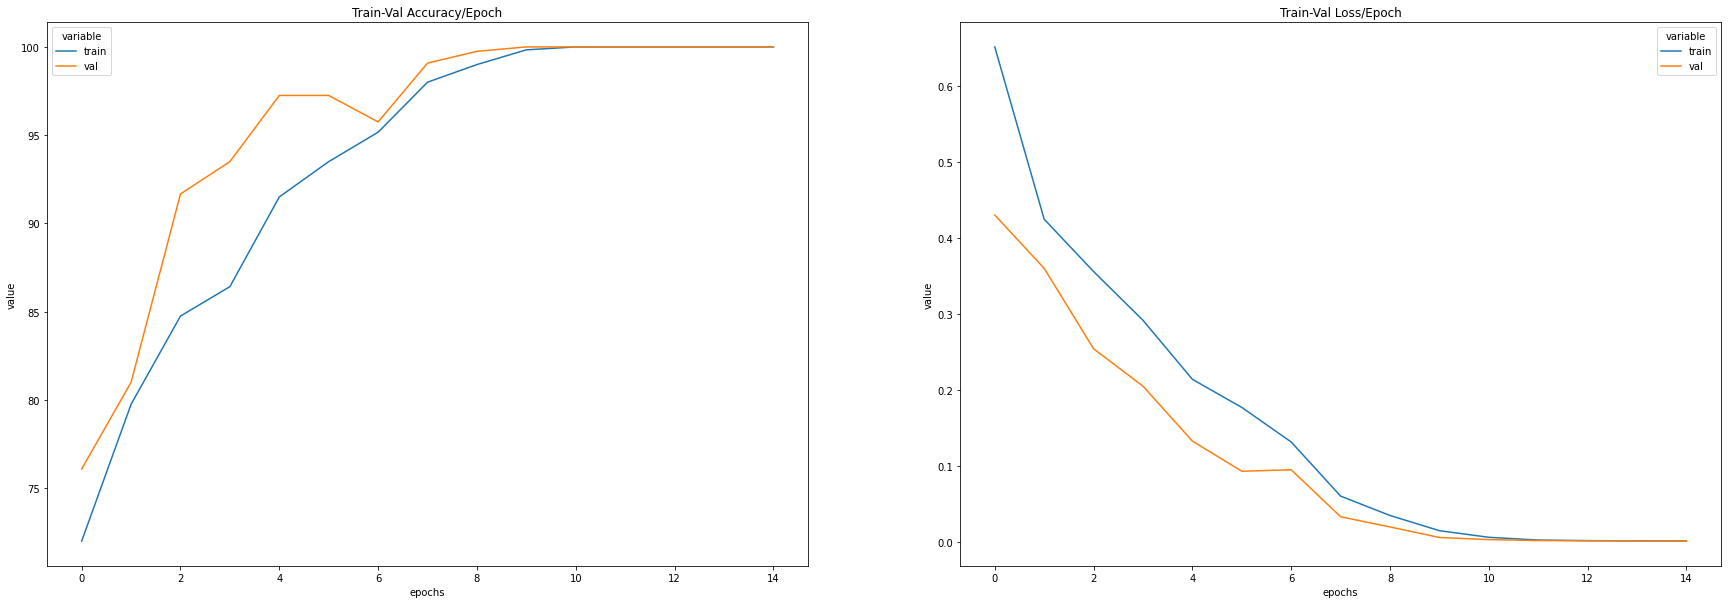

In [ ]:
model = CNN_Topo()
model.apply(init_weights)
model = model.double()
train(args, model)

In [ ]:
test_data = DEM_Dataset(args.num_samples, layers = args.layer_types, train = False)
testloader = torch.utils.data.DataLoader(test_data, batch_size=args.batch_size,shuffle=True)

# Sketch of what to do with test data, from https://towardsdatascience.com/pytorch-tabular-binary-classification-a0368da5bb89
y_pred_list = []
model.eval()
with torch.no_grad():
    # for i, val_data in enumerate(testloader,0):
    #           val_input, val_label = val_data
    #           print(val_label)
    for X_batch in testloader:
        # X_batch = X_batch.to(device)
        test_input, test_label = X_batch
        y_test_pred = model(X_batch)
        # This may need to be softmax, since using loss function same as https://towardsdatascience.com/pytorch-vision-binary-image-classification-d9a227705cf9
        # See "architecture" section of this source for explanation
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.cpu().numpy())
        

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

TypeError: ignored

# load model


In [ ]:
m_dict = torch.load('/content/drive/MyDrive/Landslide Project/Landslide Prediction CNN.pth')

In [ ]:
model = CNN_Topo()
model = model.double()
model.load_state_dict(m_dict)
device = torch.device(args.device)
model.to(device)
model.eval()

CNN_Topo(
  (conv1): Conv2d(4, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=51200, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=2, bias=True)
)

In [ ]:
print(type(model))

<class '__main__.CNN_Topo'>


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
test_data = DEM_Dataset(200, layers = args.layer_types, train = False)
testloader = torch.utils.data.DataLoader(test_data, batch_size=args.batch_size,shuffle=True)
accuracy = 0

# Sketch of what to do with test data, from https://towardsdatascience.com/pytorch-tabular-binary-classification-a0368da5bb89
y_pred_list = []
y_labels_list = []
with torch.no_grad():
  # for i, val_data in enumerate(valloader,0):
  #             val_input, val_label = val_data
  #             # nan_to_num in dataset creation but nan's still appearing in inputs - not sure why
  #             val_input[torch.isnan(val_input)] = 0
  #             val_input, val_label = val_input.to(device), val_label.to(device)
              
  #             output = model(val_input)
    for X_batch in testloader:
        # X_batch = X_batch.to(device)
        items, labels = X_batch
        items, labels = items.to(device), labels.to(device)
        # print(items)
        # items = items.type(torch.DoubleTensor)
        items = items.to(torch.double)
        y_test_pred = model(items.double())

        val_acc = binary_acc(y_test_pred, labels)
        accuracy += val_acc
        # This may need to be softmax, since using loss function same as https://towardsdatascience.com/pytorch-vision-binary-image-classification-d9a227705cf9
        # See "architecture" section of this source for explanation

        y_pred_tag = torch.log_softmax(y_test_pred, dim = 1)
        _, y_pred_tags = torch.max(y_pred_tag, dim = 1)
        y_pred_list.append(y_pred_tags.cpu().numpy())
        y_labels_list.append(labels.numpy())
      
        # y_test_pred = torch.sigmoid(y_test_pred)
        # y_pred_tag = torch.round(y_test_pred)
                                 

        # y_pred_list.append(y_pred_tag.cpu().numpy())
        # y_labels_list.append(labels)




y_pred_list = [a for a in y_pred_list]
y_labels_list = [a for a in y_labels_list]

y_preds = np.array(y_pred_list).flatten()
y_labels = np.array(y_labels_list).flatten()
print(y_preds)



# for a, b in zip(y_pred_list, y_labels_list):
#   print(a.flatten())
#   print(type(b))
#   y_preds.append(a.tolist())
#   y_labels.append(b.tolist())

print(y_preds.shape)
print(f'Accuracy: {accuracy / len(y_pred_list)}')

print(y_preds[0])
print(y_labels[0])



[0 0 0 1 0 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0 0
 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1
 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1
 1 1 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0
 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0]
(200,)
Accuracy: 86.5
0
1


In [ ]:
print(f'confusion matrix: \n {confusion_matrix(y_labels,y_preds)}')
print(classification_report(y_labels,y_preds))
print(f'Accuracy: {accuracy_score(y_labels, y_preds)}')

confusion matrix: 
 [[86 14]
 [13 87]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       100
           1       0.86      0.87      0.87       100

    accuracy                           0.86       200
   macro avg       0.87      0.86      0.86       200
weighted avg       0.87      0.86      0.86       200

Accuracy: 0.865
